In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'quorafeatures:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5824723%2F9558624%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241006%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241006T215948Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D548a2bd1927d78aaa43a88c5ec31fac20ed0f1dd3b1a294b3982fef09ee2cdec6f0dee58d2ef972e6c0b9230fef6c5436f3e4a39e2be1ef5bbe935a4c9cbf7f8f736878e46cb3f73dac6908b25e8995a3d05c752a20b07f45abafd86b476e2ee8e21f8892a744cd7e6073d369d002ce7bdce3a3a3bf7535c0d3b8eaa4a9dce6b844fbc8226b278f20b6b544a14c60570b40baef916021974124a74f7c206b7551f2e532c62cb461909809ca3961b3f718a26584a5bb1ebdb4df777097fee7273d72cb699ebe70cec7887060b877ede24dfba01f960f1c79d50f11bd2d28214b8576e59e27b7ce22175f528eacda45be3ca4bee4463e0f6045b5629b1569b9e89'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/kaggle/input/quorafeatures/final_features.csv")

In [ ]:
df.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,question1_lemmatized,question2_lemmatized,q1_len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,198127,198127,570,140055,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made c...,1,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made cup ...,61,...,0.299997,0.428565,0.428565,3.0,12.5,32.0,65,56,59,63
1,338078,338078,361056,465606,how can you determine the valency of hydrogen,how is valency of phosphorus determined,0,how can you determine the valency of hydrogen,how is valency of phosphorus determined,45,...,0.333322,0.333322,0.333322,2.0,7.0,35.0,50,54,64,67
2,246894,246894,344397,360022,how can i inspire you,how can i inspire myself,0,how can i inspire you,how can i inspire myself,21,...,0.999900,0.999900,0.999900,0.0,5.0,5.0,84,90,84,89
3,79011,79011,134619,1121,what are the must places to visit in kerala 6...,what are the best places to visit in kerala fo...,1,what are the must place to visit in kerala 6 7...,what are the best place to visit in kerala for...,50,...,0.428565,0.499992,0.499992,0.0,12.0,18.0,79,84,68,85
4,150179,150179,236419,236420,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,0,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,45,...,0.333330,0.749981,0.749981,8.0,12.0,56.0,46,58,48,66


In [ ]:
df=df.drop(["Unnamed: 0",'qid1','qid2'],axis=1)

In [ ]:
ques_df=df[['question1_lemmatized','question2_lemmatized']]
ques_df.head()

,question1_lemmatized,question2_lemmatized
0,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made cup ...
1,how can you determine the valency of hydrogen,how is valency of phosphorus determined
2,how can i inspire you,how can i inspire myself
3,what are the must place to visit in kerala 6 7...,what are the best place to visit in kerala for...
4,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...


In [ ]:
final_df=df.drop(['question1','question2','question1_lemmatized','question2_lemmatized','id'],axis=1)

In [ ]:
final_df.shape

(100000, 23)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np #Added import for numpy

questions=list(ques_df['question1_lemmatized'])+list(ques_df['question2_lemmatized'])
cv=CountVectorizer(max_features=3000)

# Convert np.nan to empty strings
questions = [str(q) if not pd.isna(q) else '' for q in questions]

q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(100000, 6000)

In [ ]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(100000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,1,61,72,11,14,6,25,0.24,0.428565,0.299997,...,0,0,0,0,0,0,0,0,0,0
1,0,45,39,8,6,3,14,0.21,0.333322,0.333322,...,0,0,0,0,0,0,0,0,0,0
2,0,21,24,5,5,4,10,0.40,0.999900,0.999900,...,0,0,0,0,0,0,0,0,0,0
3,1,50,62,12,12,8,24,0.33,0.499992,0.428565,...,0,0,0,0,0,0,0,0,0,0
4,0,45,89,8,16,3,24,0.12,0.749981,0.333330,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
X_train.size

481760000

In [ ]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.7959


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Define smaller parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],              # Lower number of trees to reduce memory usage
    'max_depth': [None, 10, 20, 30],             # Limit the depth of the trees
    'min_samples_split': [2, 5, 10],             # Larger split reduces tree growth
    'min_samples_leaf': [1, 2, 4],               # Limit number of leaf nodes
    'max_features': ['sqrt', 'log2'],            # Use a subset of features
    'bootstrap': [True, False],                  # Use bootstrapping or not
}

# Randomized Search with a limited number of iterations
rf = RandomForestClassifier()
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,                # Limit iterations
    cv=3,                     # 3-fold cross-validation
    verbose=1,
    n_jobs=-1                 # Parallelize computation if possible
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best Score: 0.771012504772251


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
svm = SVC()
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)



In [ ]:
import regex as re

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [ ]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.3 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [ ]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [ ]:
pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 4.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=63fc16d7d21b688a87f82f0aef4aafcb1f72a84f126269c80b8e6a98e8b667be
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [ ]:
pip install fuzzywuzzy


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

/usr/local/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

In [ ]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))

In [ ]:
def test_fetch_token_features(q1,q2):

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [ ]:
def test_fetch_length_features(q1,q2):

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [ ]:
def test_fetch_fuzzy_features(q1,q2):

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
def query_point_creator(q1,q2):

    input_query = []

    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))

    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))

    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))

    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)

    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)

    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)

    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()

    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()



    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [ ]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [ ]:
stacking_classifier.predict(query_point_creator(q1,q3))

array([1])

In [ ]:
prediction_probabilities = stacking_classifier.predict_proba(query_point_creator(q1, q4))
fuzzy_prediction = prediction_probabilities[:, 1]  # Probabilities for the positive class (range 0-1)
print(fuzzy_prediction)


[0.46106903]


In [ ]:
import numpy as np

# Example of a trapezoidal fuzzy membership function
def fuzzy_membership_trapezoidal(x, a, b, c, d):
    """ Trapezoidal membership function with four parameters: a, b, c, d. """
    return np.maximum(np.minimum((x - a) / (b - a), 1, (d - x) / (d - c)), 0)

# Make predictions and apply fuzzy logic
def fuzzy_prediction(q1, q3, stacking_classifier):
    # Get the predicted probabilities from the classifier
    prediction_probabilities = stacking_classifier.predict_proba(query_point_creator(q1, q4))

    # Probability for class 1 (similarity) for each query point
    prob_class_1 = prediction_probabilities[:, 1]

    # Apply fuzzy logic: using a trapezoidal membership function
    # You can adjust the values of a, b, c, and d based on your use case
    fuzzy_output = fuzzy_membership_trapezoidal(prob_class_1, 0.3, 0.4, 0.6, 0.7)

    return fuzzy_output

# Call the fuzzy prediction
fuzzy_result = fuzzy_prediction(q1, q4, stacking_classifier)
print(fuzzy_result)


[1.]


In [ ]:
import pickle

pickle.dump(rf,open('model2.pkl','wb'))

In [ ]:
cv

CountVectorizer(max_features=3000)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Confusion Matrix:
[[10897  1617]
 [ 2465  5021]]


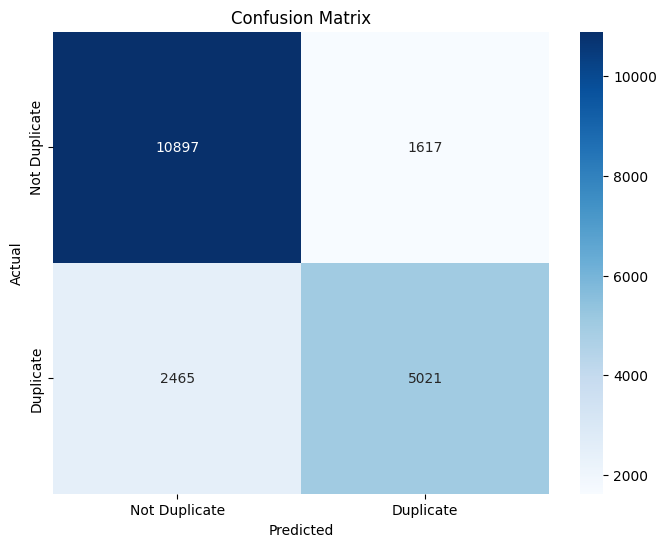


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84     12514
           1       0.76      0.67      0.71      7486

    accuracy                           0.80     20000
   macro avg       0.79      0.77      0.78     20000
weighted avg       0.79      0.80      0.79     20000



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = rf.predict(X_test)

# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Duplicate', 'Duplicate'],
            yticklabels=['Not Duplicate', 'Duplicate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 4.0 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import lightgbm as lgb

[LightGBM] [Info] Number of positive: 29616, number of negative: 50384
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.212238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19267
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 5923
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370200 -> initscore=-0.531359
[LightGBM] [Info] Start training from score -0.531359
Confusion Matrix:
[[10734  1780]
 [ 2271  5215]]


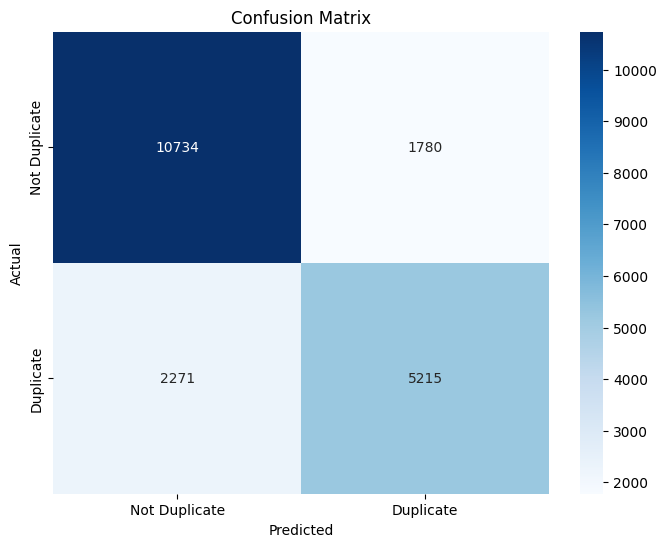


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     12514
           1       0.75      0.70      0.72      7486

    accuracy                           0.80     20000
   macro avg       0.79      0.78      0.78     20000
weighted avg       0.80      0.80      0.80     20000



In [ ]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Duplicate', 'Duplicate'],
            yticklabels=['Not Duplicate', 'Duplicate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 5.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:

from xgboost import XGBClassifier

Confusion Matrix:
[[10785  1729]
 [ 2403  5083]]


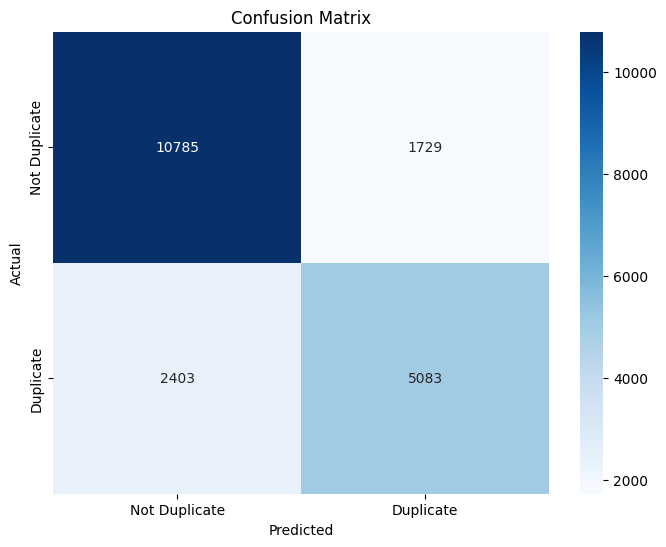


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84     12514
           1       0.75      0.68      0.71      7486

    accuracy                           0.79     20000
   macro avg       0.78      0.77      0.78     20000
weighted avg       0.79      0.79      0.79     20000



In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Duplicate', 'Duplicate'],
            yticklabels=['Not Duplicate', 'Duplicate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression

Confusion Matrix:
[[10713  1801]
 [ 2333  5153]]


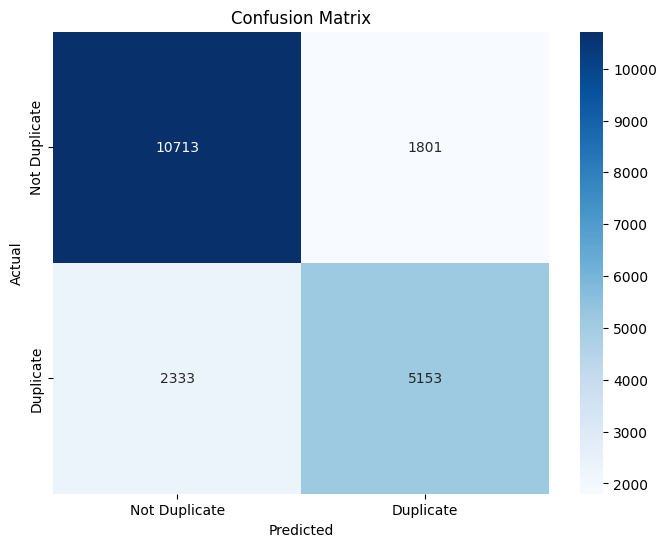


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84     12514
           1       0.74      0.69      0.71      7486

    accuracy                           0.79     20000
   macro avg       0.78      0.77      0.78     20000
weighted avg       0.79      0.79      0.79     20000



In [ ]:
rf_model = RandomForestClassifier()
lgbm_model = XGBClassifier()

# Meta Learner
meta_learner = LogisticRegression()


# Train base learners
rf_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)


# Get predictions from base learners
rf_pred_train = rf_model.predict_proba(X_train)
lgbm_pred_train = lgbm_model.predict_proba(X_train)

rf_pred_test = rf_model.predict_proba(X_test)
lgbm_pred_test = lgbm_model.predict_proba(X_test)


# Create a new dataset with predictions from base learners
X_train_meta = np.concatenate([rf_pred_train, lgbm_pred_train], axis=1)
X_test_meta = np.concatenate([rf_pred_test, lgbm_pred_test], axis=1)

# Train the meta learner
meta_learner.fit(X_train_meta, y_train)

# Make predictions using the meta learner
y_pred_meta = meta_learner.predict(X_test_meta)


# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_meta)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Duplicate', 'Duplicate'],
            yticklabels=['Not Duplicate', 'Duplicate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_meta))


In [ ]:
import tensorflow as tf

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
import tensorflow as tf

# Detect TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # Detect TPU
    print('Running on TPU ', tpu.master())
except ValueError:
    print('Not connected to a TPU')

# Initialize the TPU system
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)


Running on TPU  
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
from lb

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define your base models (e.g., RandomForest, XGBoost, LightGBM)
base_models = [
    ('rf', RandomForestClassifier()),
    ('lgbm',lgb.LGBMClassifier()),
    ('xgb', XGBClassifier()),
]

# Define your meta-learner (e.g., Logistic Regression)
meta_learner = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_classifier.predict(X_test)

# Evaluate the model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Stacking Accuracy:", accuracy_stacking)

print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))

cm = confusion_matrix(y_test, y_pred_stacking)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


[LightGBM] [Info] Number of positive: 29616, number of negative: 50384
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.248967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19267
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 5923
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370200 -> initscore=-0.531359
[LightGBM] [Info] Start training from score -0.531359
[LightGBM] [Info] Number of positive: 23693, number of negative: 40307
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.173867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18030
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 5516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370203 -> initscore=-0.531346
[LightGBM] [Info] Start training from score -0.531346
[Light

NameError: name 'confusion_matrix' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_stacking = stacking_classifier.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Stacking Accuracy:", accuracy_stacking)
print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))
cm = confusion_matrix(y_test, y_pred_stacking)
plt.show()

Stacking Accuracy: 0.80315
[[10721  1793]
 [ 2144  5342]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     12514
           1       0.75      0.71      0.73      7486

    accuracy                           0.80     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.80      0.80      0.80     20000



NameError: name 'plt' is not defined